**Dataset**

The name of the dataset is sales.csv

**Context**

This dataset is a record of some building or building unit (apartment, etc.) sold in the New York City property market over a 8-month period.

**Content**

This dataset contains the location, address, type, sale price, and sale date of building units sold. A reference on the trickier fields:

    BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).
    BLOCK, LOT: The combination of borough, block, and lot forms a unique key for property in New York City. Commonly called a BBL.

Note that because this is a financial transaction dataset, there are some points that need to be kept in mind:

    Many sales occur with a nonsensically small dollar amount: $0 most commonly. These sales are actually transfers of deeds between parties: for example, parents transferring ownership to their home to a child after moving out for retirement.

Import the sales.csv dataset

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
pd.__version__

'2.2.2'

In [5]:
sales=pd.read_csv("D:/IVY Class Importatnt/Python/Sales(1).csv")

In [7]:
def bbl(x,y,z):
    return str(x)+"-"+str(y)+"-"+str(z)

sales['BBL'] = sales.apply(lambda x:bbl(x['BOROUGH'],x['BLOCK'],x['LOT']),axis=1)

In [8]:
import numpy as np
def change_date(date):
    if "-" in date:
        return pd.to_datetime(date,format='%d-%m-%Y')
    elif "/" in date:
        return pd.to_datetime(date,format='%m/%d/%Y')
    else:
        return np.NaN

In [9]:
sales['SALE_DATE'] = sales['SALE DATE'].apply(lambda x:change_date(x))

In [28]:
sales = sales.drop_duplicates('BBL',keep = 'first')

In [16]:
sales = sales.sort_values(by = ['BBL','SALE_DATE'],ascending = [True,False])

In [32]:
sales.shape

(3475, 17)

check the info of the dataset

In [29]:
sales.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BBL,SALE_DATE
2457,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1003,1443,150 WEST 51ST STREET,10019,1,0,1,0,0,0,5/16/2017,1-1003-1443,2017-05-16
3021,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1005,1087,135 WEST 52ND STREET,10019,1,0,1,0,1987,5050000,05-03-2017,1-1005-1087,2017-03-05
2865,1,MIDTOWN WEST,10 COOPS - ELEVATOR APARTMENTS,2,1007,54,"150 WEST 55TH STREET, 8C",10019,0,0,0,0,1923,985000,08-09-2017,1-1007-54,2017-09-08
3218,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1008,1199,150 WEST 56TH STREET,10019,1,0,1,0,1987,725000,01-12-2017,1-1008-1199,2017-12-01
1675,1,MIDTOWN WEST,13 CONDOS - ELEVATOR APARTMENTS,2,1008,1216,150 WEST 56TH STREET,10019,1,0,1,0,1987,1925000,1/25/2017,1-1008-1216,2017-01-25


In [30]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3475 entries, 2457 to 493
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   BOROUGH                  3475 non-null   int64         
 1   NEIGHBORHOOD             3475 non-null   object        
 2   BUILDING CLASS CATEGORY  3475 non-null   object        
 3   TAX CLASS AT PRESENT     3475 non-null   object        
 4   BLOCK                    3475 non-null   int64         
 5   LOT                      3475 non-null   int64         
 6   ADDRESS                  3475 non-null   object        
 7   ZIP CODE                 3475 non-null   int64         
 8   RESIDENTIAL UNITS        3475 non-null   int64         
 9   COMMERCIAL UNITS         3475 non-null   int64         
 10  TOTAL UNITS              3475 non-null   int64         
 11  LAND SQUARE FEET         3475 non-null   int64         
 12  YEAR BUILT               3475 non-nul

check the description of the dataset

In [19]:
sales.describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,SALE_DATE
count,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3579.000000,3.579000e+03,3579.000000,3.579000e+03,3579
mean,2.966192,4150.419670,381.842414,10680.873987,2.290025,0.153674,2.473875,3.605483e+03,1782.920648,1.005316e+06,2017-05-25 09:19:39.882648832
min,1.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,2017-01-02 00:00:00
25%,2.000000,1323.500000,22.000000,10303.000000,0.000000,0.000000,1.000000,0.000000e+00,1920.000000,0.000000e+00,2017-03-20 00:00:00
50%,3.000000,3164.000000,50.000000,11208.000000,1.000000,0.000000,1.000000,1.710000e+03,1940.000000,4.300000e+05,2017-05-25 00:00:00
75%,4.000000,6067.500000,1002.000000,11355.000000,2.000000,0.000000,2.000000,2.668500e+03,1966.000000,8.475000e+05,2017-07-21 00:00:00
max,5.000000,16316.000000,7232.000000,11694.000000,1844.000000,184.000000,1866.000000,4.228300e+06,2017.000000,8.637500e+07,2017-12-08 00:00:00
std,1.294840,3531.382379,637.913571,1447.476149,31.872076,3.250381,32.387727,7.225966e+04,547.202378,3.513772e+06,NaN


In [20]:
sales.tail()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,YEAR BUILT,SALE PRICE,SALE DATE,BBL,SALE_DATE
1681,5,DONGAN HILLS-COLONY,01 ONE FAMILY DWELLINGS,1,841,79,163 WILSON TERRACE,10304,1,0,1,4000,1955,640000,3/28/2017,5-841-79,2017-03-28
2064,5,DONGAN HILLS-COLONY,01 ONE FAMILY DWELLINGS,1,848,228,107 SPARKILL AVENUE,10304,1,0,1,4000,1940,510000,1/23/2017,5-848-228,2017-01-23
2539,5,DONGAN HILLS-COLONY,02 TWO FAMILY DWELLINGS,1,869,647,17 ROCHELLE STREET,10304,2,0,2,8800,1955,0,03-06-2017,5-869-647,2017-06-03
1587,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,881,280,1 BUTTONWOOD ROAD,10304,1,0,1,12154,1975,1735000,04-04-2017,5-881-280,2017-04-04
493,5,TODT HILL,01 ONE FAMILY DWELLINGS,1,882,250,426 WOODDALE AVENUE,10301,1,0,1,10000,1950,0,7/18/2017,5-882-250,2017-07-18


Read this - BOROUGH: A digit code for the borough the property is located in; in order these are Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), and Staten Island (5).

After reading answers the following questions :-
1. How many property is located in Manhattan (1).
2. How many property is located in Bronx (2).
3. How many property is located in Brooklyn (3).
4. How many property is located in Queens (4).
5. How many property is located in Staten Island (5).

In [33]:
borough_counts = sales['BOROUGH'].value_counts()

In [34]:
print("\nNumber of properties in each borough:")
print(f"Manhattan (1): {borough_counts.get(1, 0)}")
print(f"Bronx (2): {borough_counts.get(2, 0)}")
print(f"Brooklyn (3): {borough_counts.get(3, 0)}")
print(f"Queens (4): {borough_counts.get(4, 0)}")
print(f"Staten Island (5): {borough_counts.get(5, 0)}")


Number of properties in each borough:
Manhattan (1): 765
Bronx (2): 295
Brooklyn (3): 1010
Queens (4): 1059
Staten Island (5): 346


In [35]:
borough_counts = sales['BOROUGH'].value_counts()
borough_summary = {
    "Manhattan (1)": borough_counts.get(1, 0),
    "Bronx (2)": borough_counts.get(2, 0),
    "Brooklyn (3)": borough_counts.get(3, 0),
    "Queens (4)": borough_counts.get(4, 0),
    "Staten Island (5)": borough_counts.get(5, 0)
}
borough_summary

{'Manhattan (1)': 765,
 'Bronx (2)': 295,
 'Brooklyn (3)': 1010,
 'Queens (4)': 1059,
 'Staten Island (5)': 346}

1. How many property have more than 60 RESIDENTIAL UNITS.
2. How many property have 10 COMMERCIAL UNITS.
3. How many property have 300 TOTAL UNITS.
4. How many property have at least 40 RESIDENTIAL UNITS as well as at least 10 COMMERCIAL UNITS.
5. How many property have zero RESIDENTIAL UNITS.
6. How many property have zero COMMERCIAL UNITS.

In [36]:
a = sales[sales['RESIDENTIAL UNITS'] > 60].shape[0]
b = sales[sales['COMMERCIAL UNITS'] == 10].shape[0]
c = sales[sales['TOTAL UNITS'] == 300].shape[0]

In [37]:
d = sales[(sales['RESIDENTIAL UNITS'] >= 40) & (sales['COMMERCIAL UNITS'] >= 10)].shape[0]
e = sales[sales['RESIDENTIAL UNITS'] == 0].shape[0]
f = sales[sales['COMMERCIAL UNITS'] == 0].shape[0]

In [38]:
summary = {
    "Properties with more than 60 Residential Units": a,
    "Properties with exactly 10 Commercial Units": b,
    "Properties with exactly 300 Total Units": c,
    "Properties with at least 40 Residential Units and at least 10 Commercial Units": d,
    "Properties with zero Residential Units": e,
    "Properties with zero Commercial Units": f
}
summary

{'Properties with more than 60 Residential Units': 8,
 'Properties with exactly 10 Commercial Units': 0,
 'Properties with exactly 300 Total Units': 0,
 'Properties with at least 40 Residential Units and at least 10 Commercial Units': 0,
 'Properties with zero Residential Units': 959,
 'Properties with zero Commercial Units': 3279}

How many Property have zero SALE PRICE

In [39]:
sales[sales['SALE PRICE'] == 0].shape[0]

1009

How many property have more than 10000 LAND SQUARE FEET and build befor 1970

In [40]:
sales[(sales["LAND SQUARE FEET"] > 10000) & (sales["YEAR BUILT"] < 1970)].shape[0]

45

How many total properties have "1A", "2A" `TAX CLASS AT PRESENT` respectively also have at least 1 million dollar `SALE PRICE`

In [41]:
count = {tax_class: sales[(sales['TAX CLASS AT PRESENT'] == tax_class) & (sales['SALE PRICE'] >= 1000000)].shape[0] for tax_class in ['1A', '2A']}
count

{'1A': 0, '2A': 34}

How many Property were build in 1980's decade

In [42]:
sales[(sales['YEAR BUILT'] >= 1980) & (sales['YEAR BUILT'] < 1990)].shape[0]

148

Create a dual-axis plot for each month that effectively visualizes the average sale price per month alongside the number of properties sold, and annotate the plot to display exact values for both metrics?

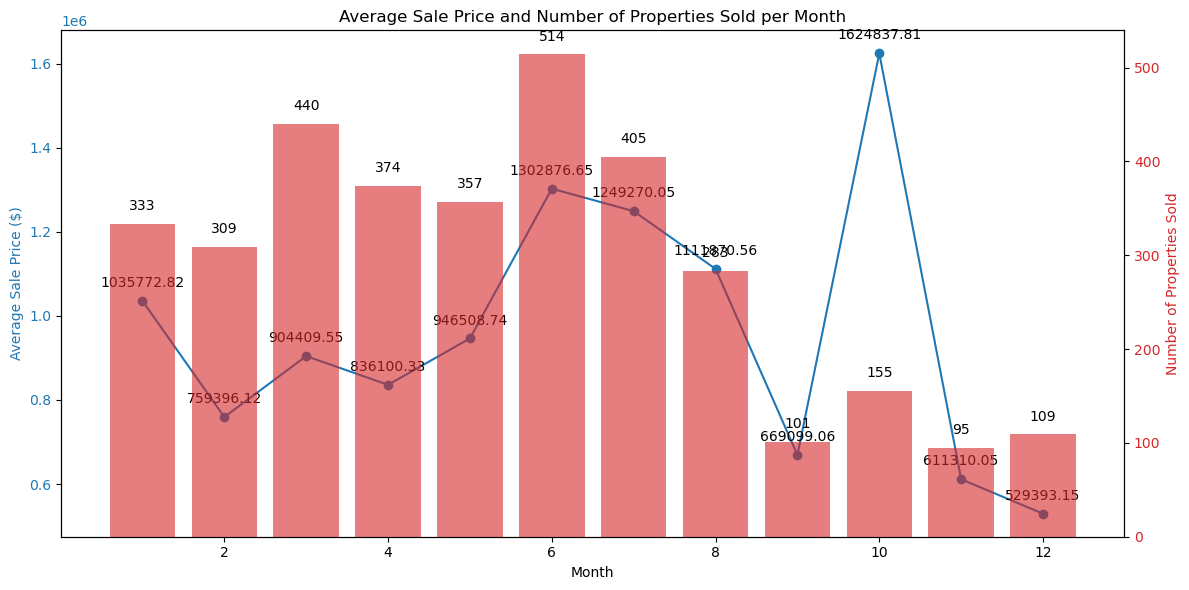

In [44]:
sales['SALE_DATE'] = pd.to_datetime(sales['SALE_DATE'])
sales['Month'] = sales['SALE_DATE'].dt.month
sales['Year'] = sales['SALE_DATE'].dt.year

monthly_data = sales.groupby(['Year', 'Month']).agg(average_sale_price=('SALE PRICE', 'mean'), properties_sold=('BLOCK', 'count')).reset_index()

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Average Sale Price ($)', color='tab:blue')
ax1.plot(monthly_data['Month'], monthly_data['average_sale_price'], color='tab:blue', marker='o', label='Average Sale Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Number of Properties Sold', color='tab:red')
ax2.bar(monthly_data['Month'], monthly_data['properties_sold'], color='tab:red', alpha=0.6, label='Properties Sold')
ax2.tick_params(axis='y', labelcolor='tab:red')

for i, value in enumerate(monthly_data['average_sale_price']):
    ax1.annotate(f'{value:.2f}', (monthly_data['Month'][i], value), textcoords="offset points", xytext=(0,10), ha='center')

for i, value in enumerate(monthly_data['properties_sold']):
    ax2.annotate(f'{value}', (monthly_data['Month'][i], value), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Average Sale Price and Number of Properties Sold per Month')
fig.tight_layout()
plt.show()